In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE
import gensim
from gensim.models import Word2Vec

In [2]:
# Defining the dictionary to get the values related to the hyperparameters
hyperparameters = {'embedding_size': 200,
                   't_num_walks': 10,
                   'walk_length': 4,
                   'epochs': 30,
                   'window_size':2}

In [3]:
class DeepWalk():
  def __init__(self, G):
    self.G = G
    self.embedding_size= hyperparameters['embedding_size']
    self.epochs = hyperparameters['epochs']
    self.walk_length = hyperparameters['walk_length']
    self.t_num_walks = hyperparameters['t_num_walks']
    self.window_size = hyperparameters['window_size']

  def make_graph_from_file(self, filename):
    with open(filename) as f:
      lines = f.readlines()
    
    mylist = [line.strip().split() for line in lines]
    
    self.G.add_edges_from(mylist)
    number_of_colors = len(self.G.nodes())
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    pos=nx.spring_layout(self.G)
    nx.draw_networkx_nodes(self.G, pos,  
                       node_color = color, node_size = 500)
    nx.draw_networkx_labels(self.G, pos)
    nx.draw(self.G,pos)
    plt.show()
    
  def count_possible_walks(self):
    count = 0 
    for node in self.G.nodes():
        neighbors = list(self.G.neighbors(node))
        print("neighbors for :", str(node), "=", str(neighbors))

  def train(self):
    print('Start training...')
    random.seed(616)
    sentences = self.random_walk()
    
    w2v = Word2Vec(sentences=sentences, size=self.embedding_size, window=self.window_size, iter=self.epochs, sg=1, hs=1, workers=4)
    w2v.save('DeepWalk.model')
    w2v.wv.save_word2vec_format('petrit')
    self.tsne_plot(w2v)
    print(w2v.wv)
    print('Training Done.')
    
  def tsne_plot(self, model):
    print(model.most_similar('a'))
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
    
  def random_walk(self):
    walks = []
    
    
    # Starting point is every time the new node of the graph
    for node in self.G.nodes():
        
        # str name of the vertex by storing in a list
        
        walk = [str(node)]
        temp_vertex = node
        vertex1 = node
        for w in range(self.t_num_walks):
            walk = [str(vertex1)]
            temp_vertex_p = vertex1
            for i in range (self.walk_length):
                neighbors = list(self.G.neighbors(temp_vertex_p))                
                if len(neighbors) > 0:
                    v = random.choice(neighbors)
                    walk.append(str(v))
                    temp_vertex_p=v
            walks.append(walk)
        
    return walks




In [4]:
G = nx.Graph()
obj = DeepWalk(G)

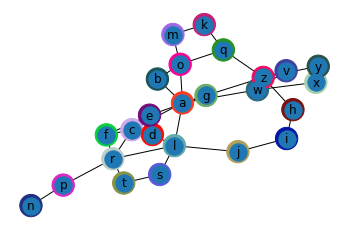

In [5]:
obj.make_graph_from_file("mode.txt")

In [6]:
for node in G.nodes():
    walks = obj.random_walk()
#obj.count_possible_walks()

In [7]:
print("10 walks per each alphabet....")
walks

10 walks per each alphabet....


[['a', 'o', 'b', 'a', 'o'],
 ['a', 'w', 'v', 'w', 'a'],
 ['a', 'b', 'a', 'l', 's'],
 ['a', 'b', 'o', 'm', 'o'],
 ['a', 'c', 'f', 'e', 'g'],
 ['a', 'c', 'd', 'c', 'r'],
 ['a', 'o', 'm', 'o', 'b'],
 ['a', 'g', 'a', 'b', 'a'],
 ['a', 'l', 'a', 'w', 'a'],
 ['a', 'g', 'e', 'g', 'a'],
 ['b', 'o', 'b', 'a', 'c'],
 ['b', 'o', 'a', 'l', 'd'],
 ['b', 'o', 'a', 'c', 'f'],
 ['b', 'o', 'm', 'o', 'a'],
 ['b', 'o', 'q', 'k', 'm'],
 ['b', 'a', 'b', 'a', 'b'],
 ['b', 'o', 'q', 'z', 'g'],
 ['b', 'o', 'b', 'o', 'm'],
 ['b', 'o', 'a', 'o', 'm'],
 ['b', 'o', 'b', 'o', 'b'],
 ['c', 'r', 'f', 'r', 'l'],
 ['c', 'a', 'b', 'o', 'm'],
 ['c', 'a', 'g', 'e', 'd'],
 ['c', 'd', 'l', 'd', 'c'],
 ['c', 'f', 'r', 'c', 'd'],
 ['c', 'r', 'l', 'r', 't'],
 ['c', 'd', 'e', 'd', 'e'],
 ['c', 'a', 'c', 'r', 'c'],
 ['c', 'd', 'l', 'a', 'g'],
 ['c', 'r', 't', 'r', 'c'],
 ['d', 'l', 'a', 'c', 'd'],
 ['d', 'l', 'd', 'e', 'g'],
 ['d', 'e', 'd', 'l', 'r'],
 ['d', 'c', 'd', 'c', 'f'],
 ['d', 'c', 'd', 'c', 'd'],
 ['d', 'l', 'd', 'e'

Start training...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[('o', 0.9848421812057495), ('z', 0.9805758595466614), ('e', 0.9790438413619995), ('d', 0.9786418080329895), ('l', 0.9779136180877686), ('c', 0.9776186943054199), ('g', 0.9771535992622375), ('w', 0.9758230447769165), ('q', 0.9755005240440369), ('f', 0.9734970927238464)]


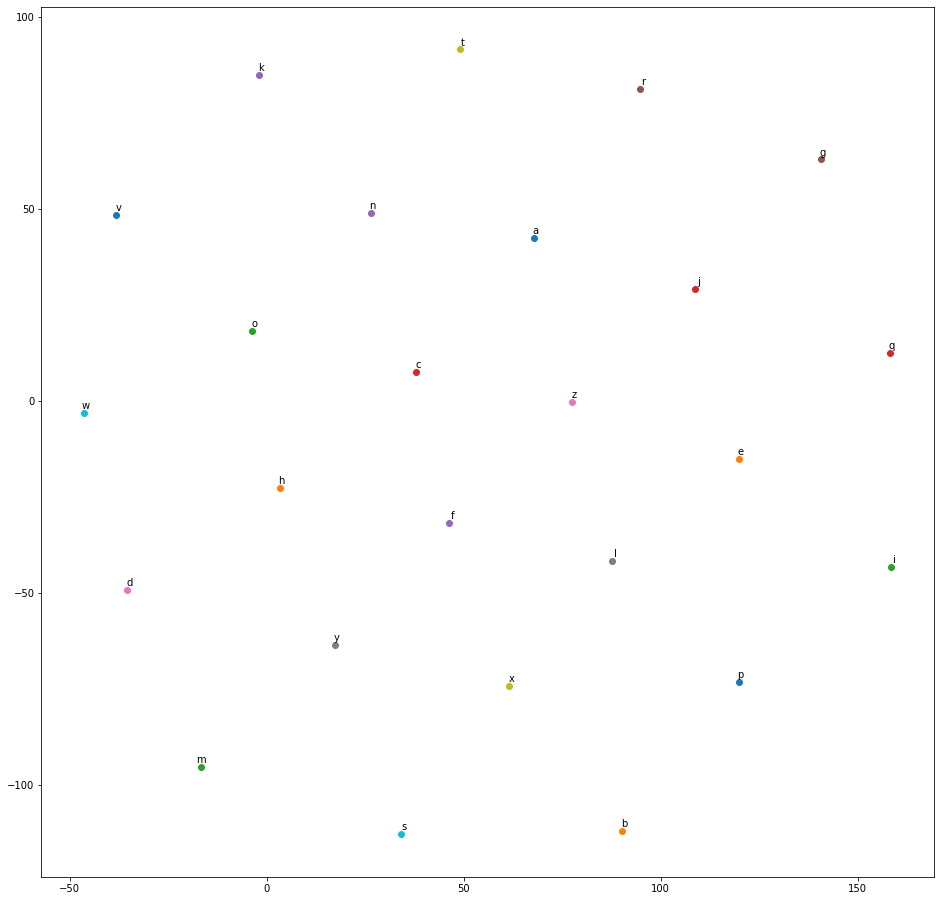

Training Done.


In [8]:
obj.train()

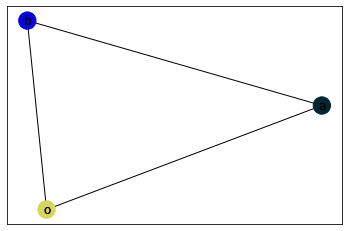

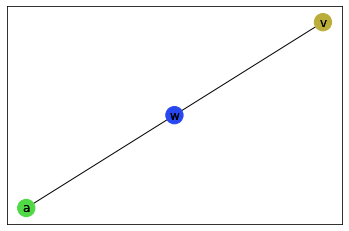

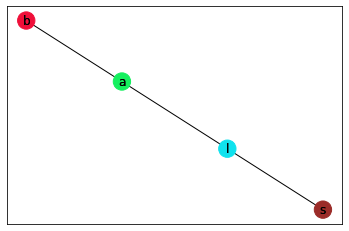

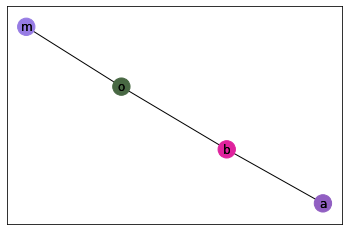

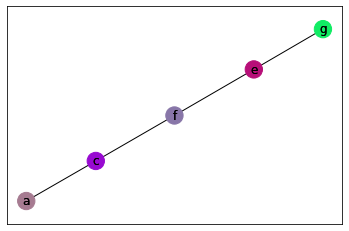

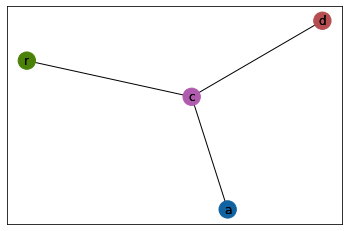

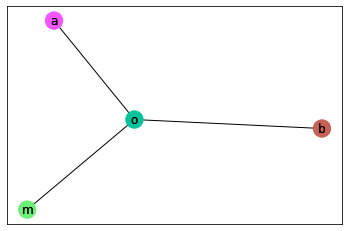

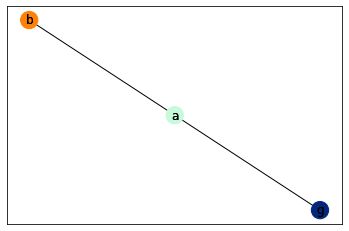

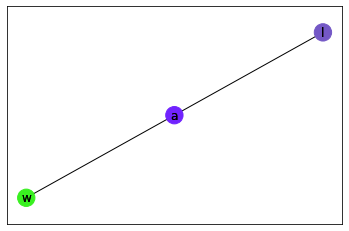

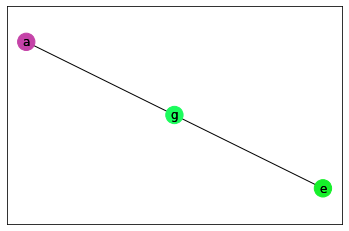

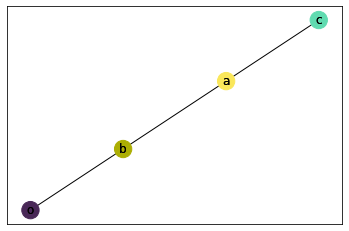

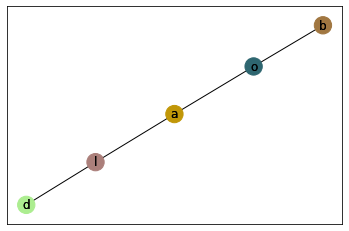

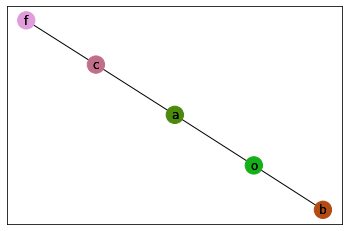

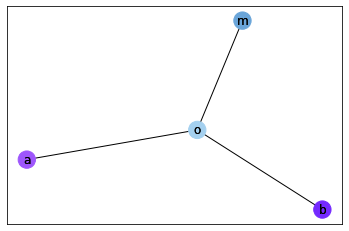

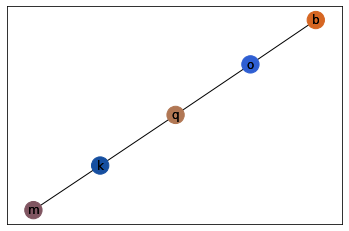

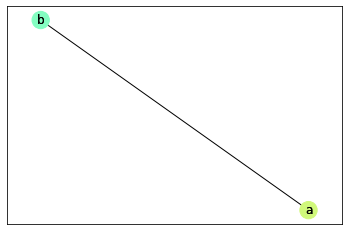

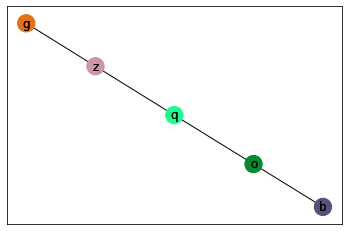

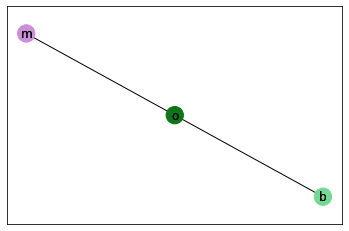

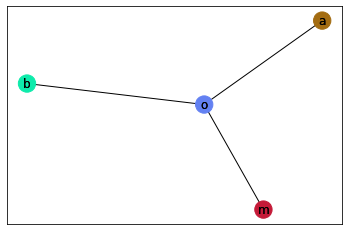

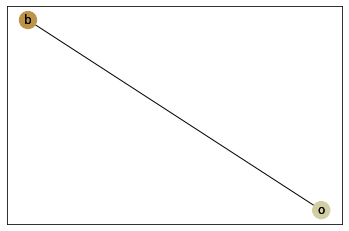

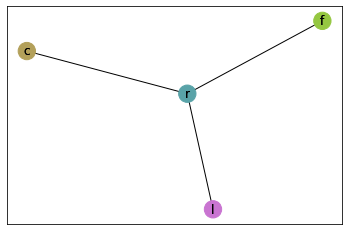

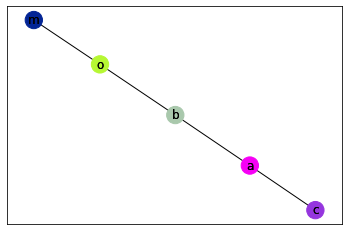

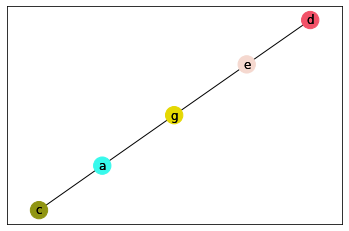

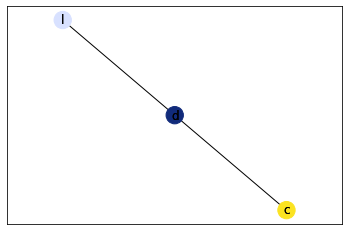

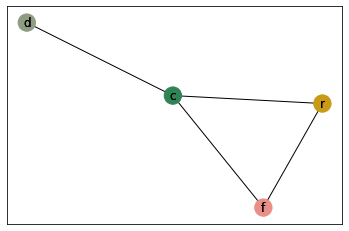

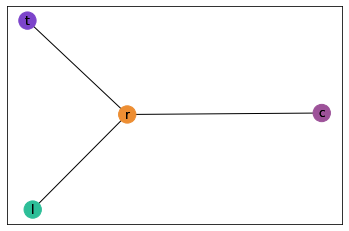

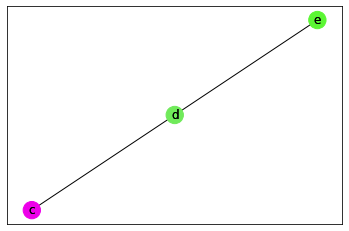

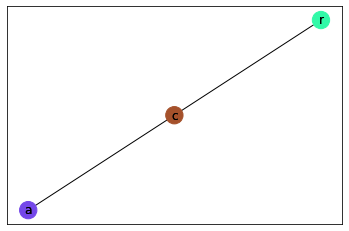

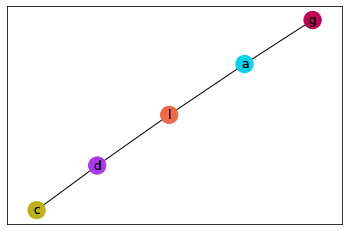

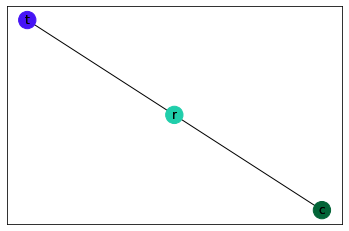

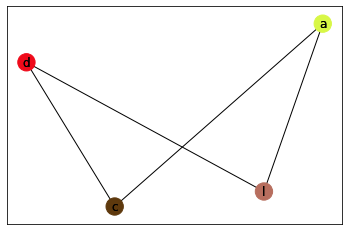

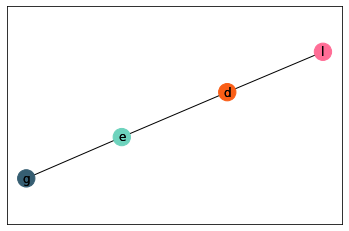

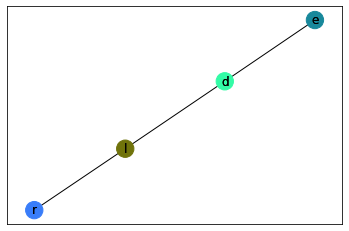

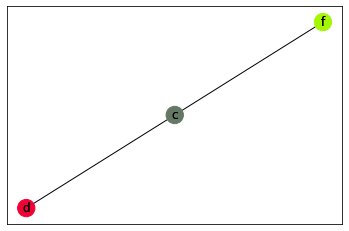

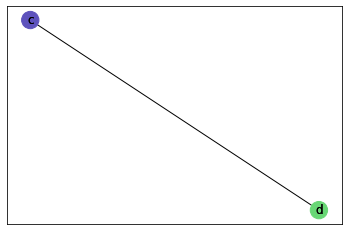

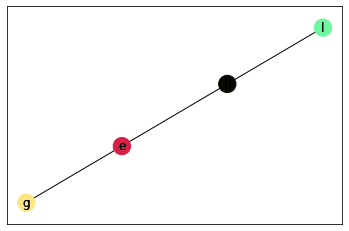

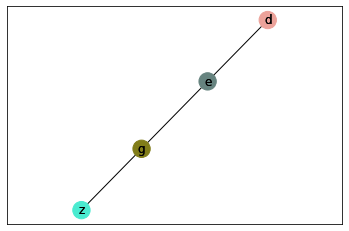

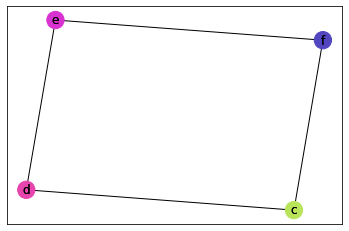

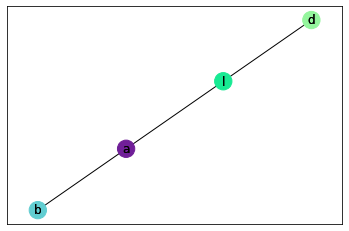

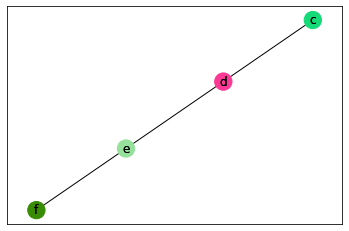

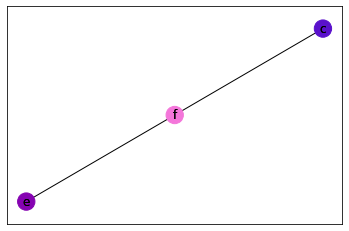

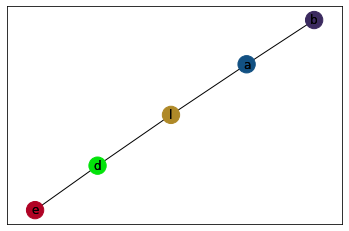

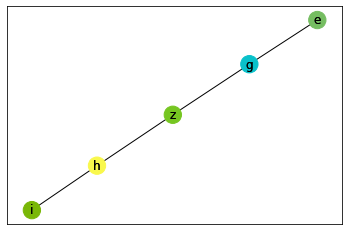

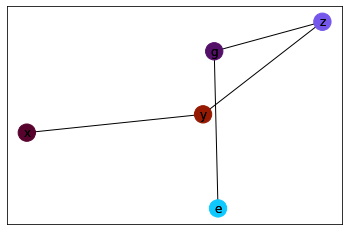

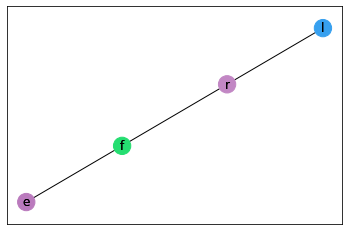

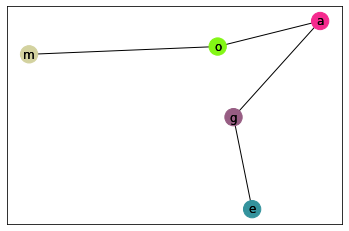

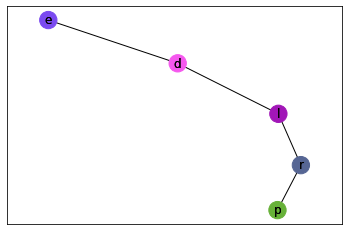

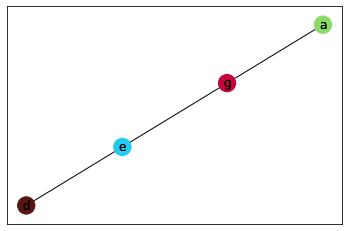

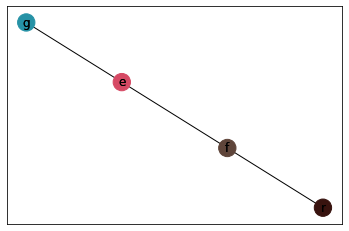

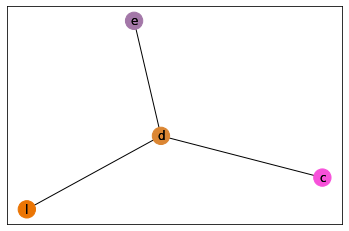

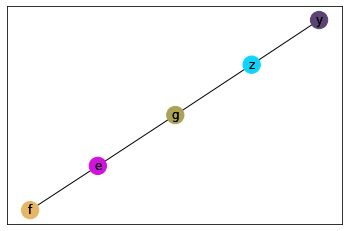

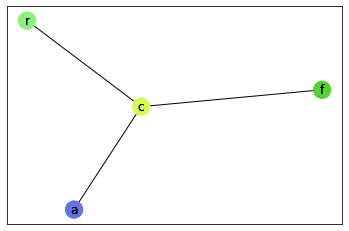

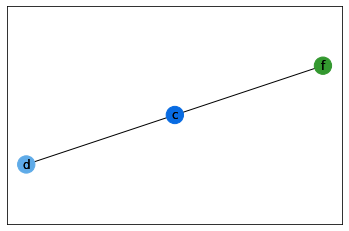

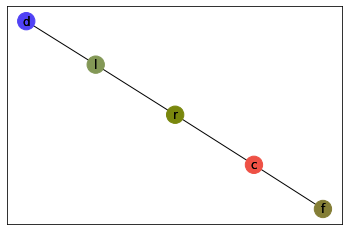

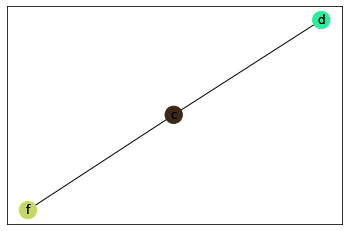

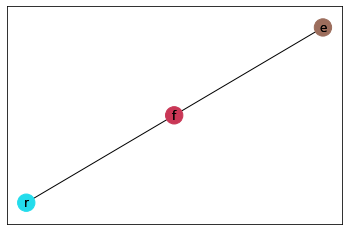

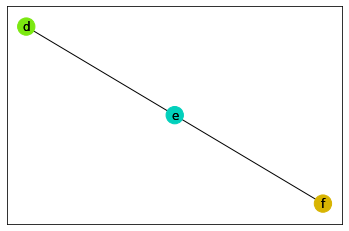

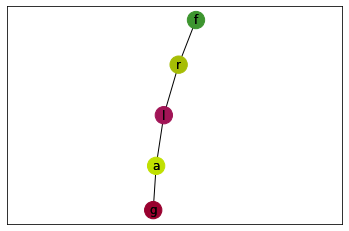

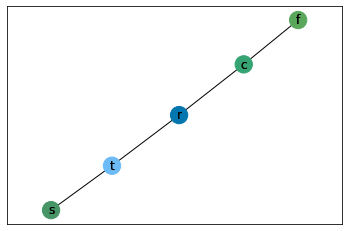

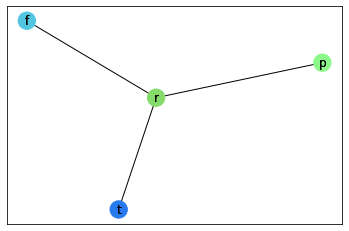

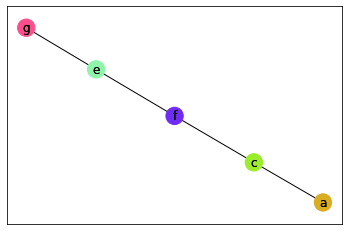

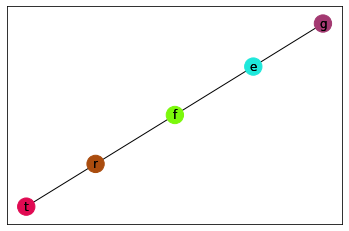

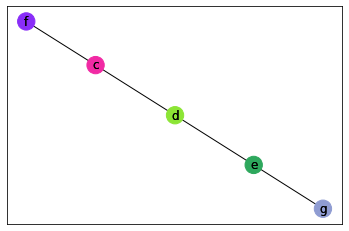

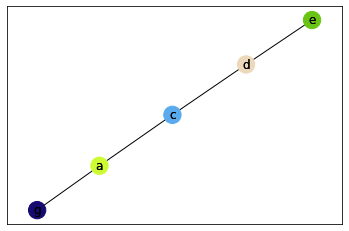

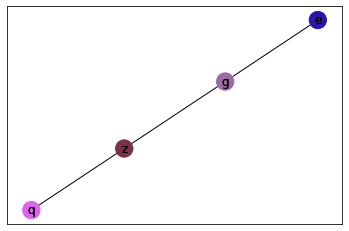

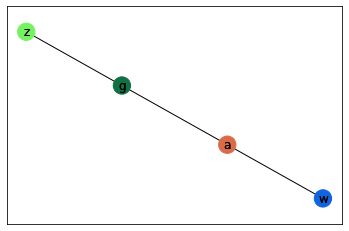

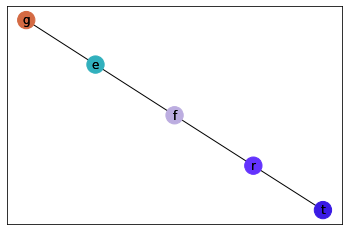

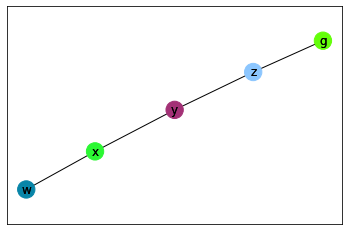

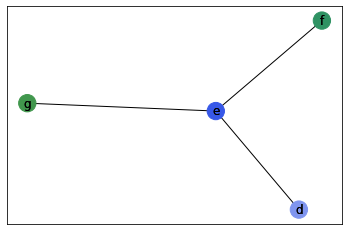

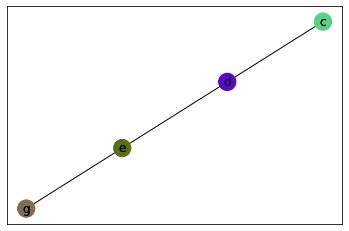

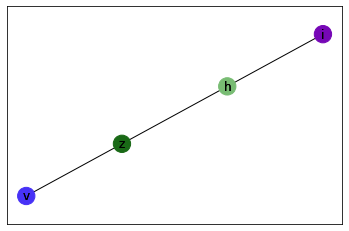

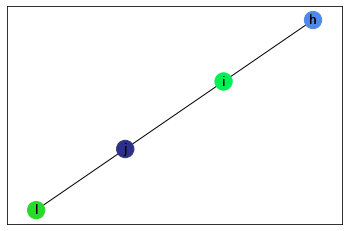

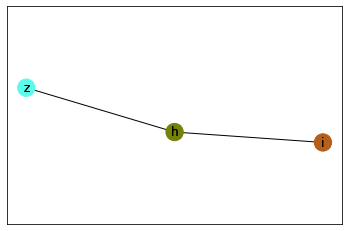

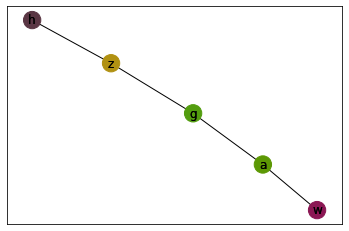

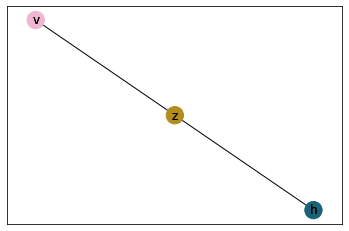

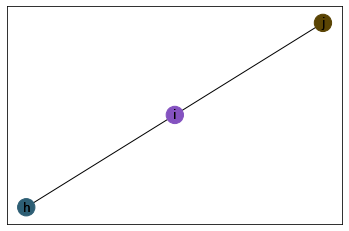

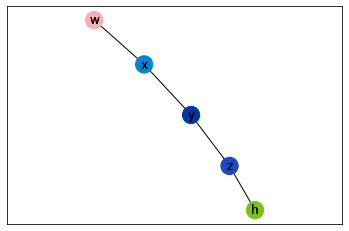

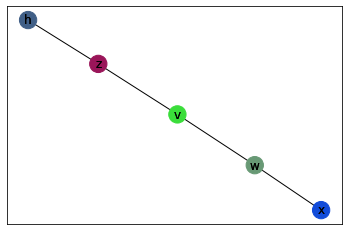

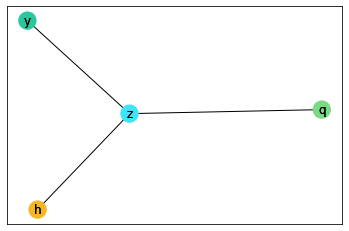

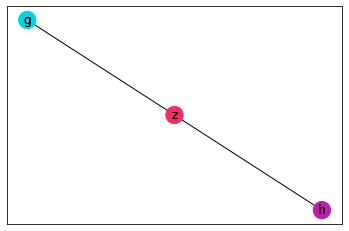

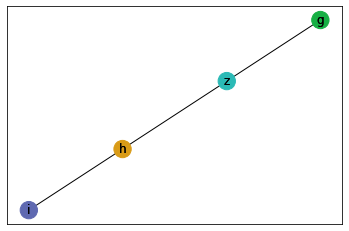

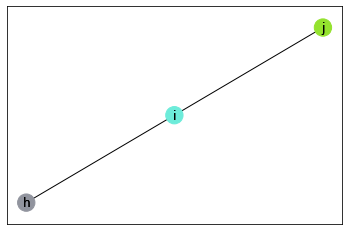

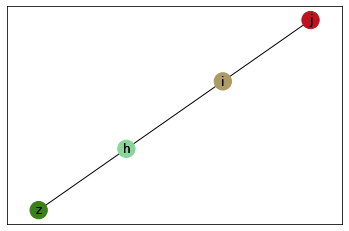

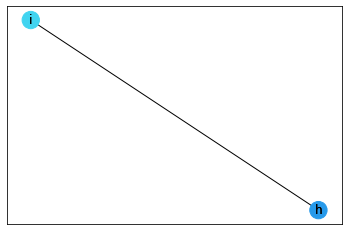

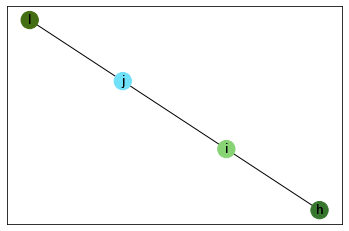

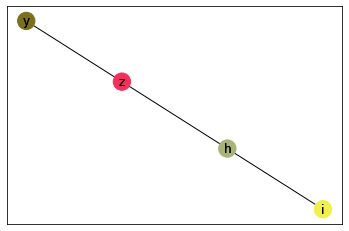

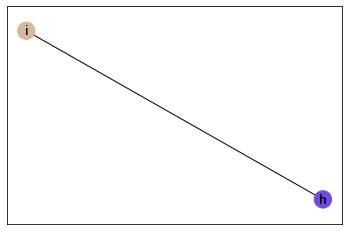

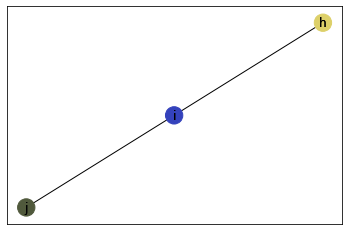

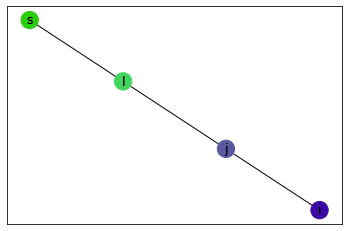

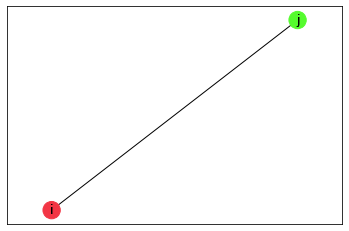

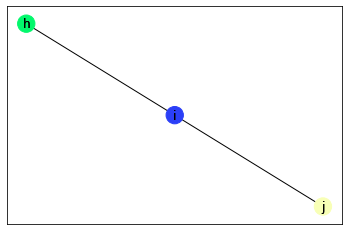

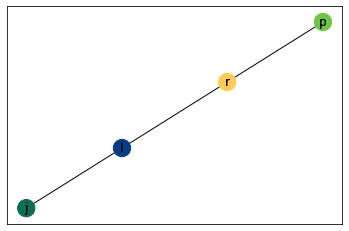

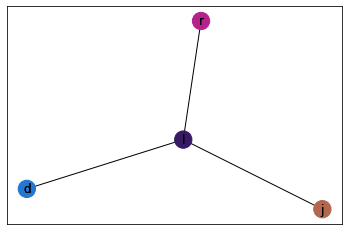

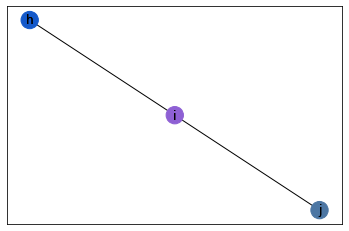

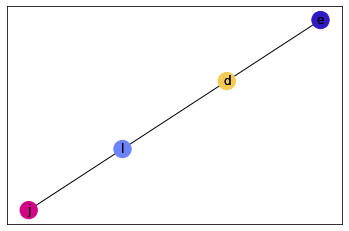

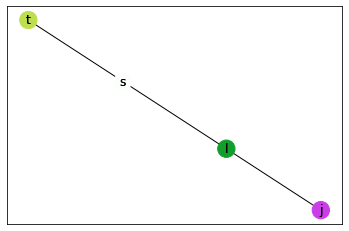

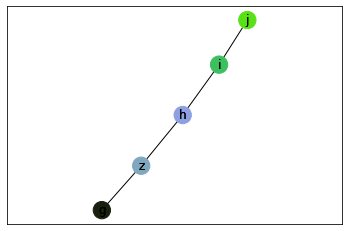

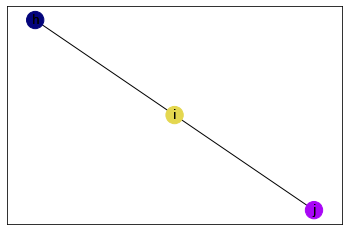

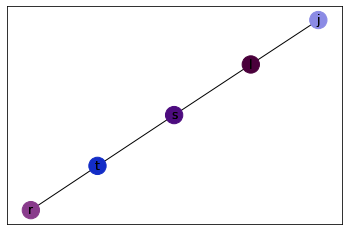

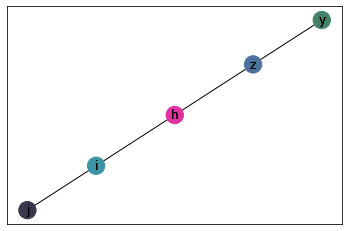

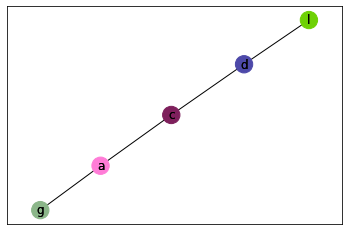

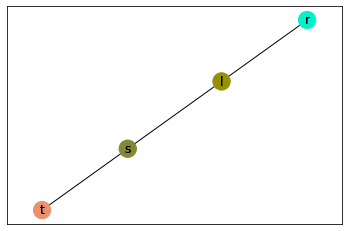

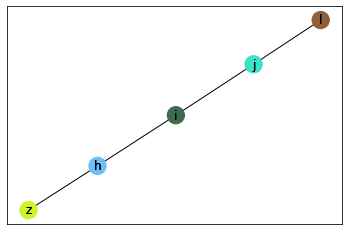

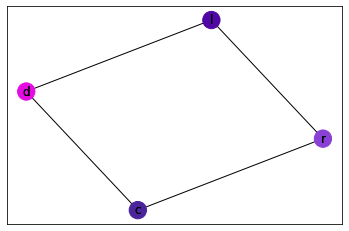

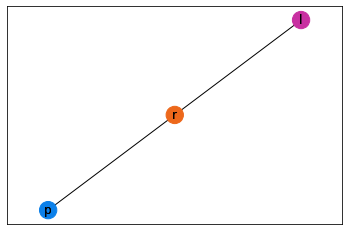

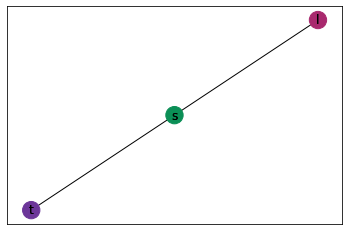

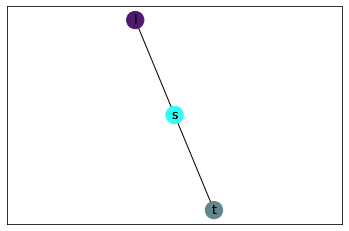

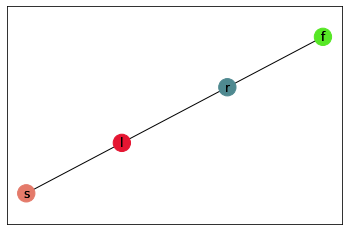

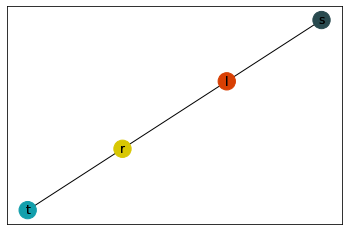

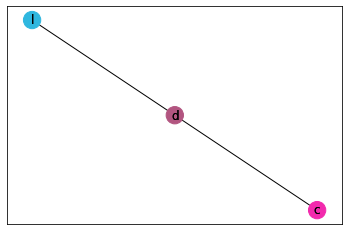

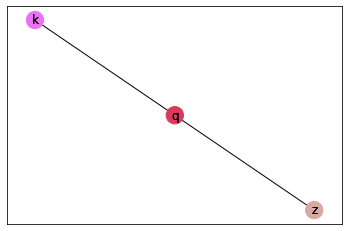

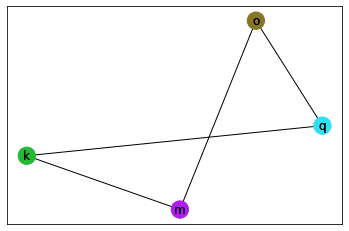

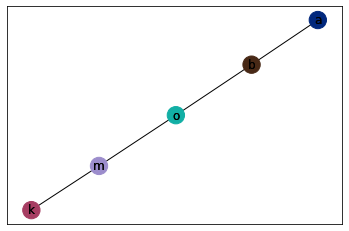

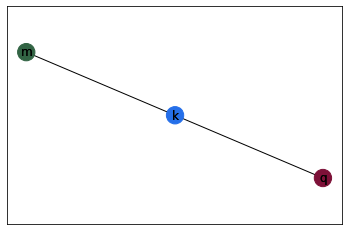

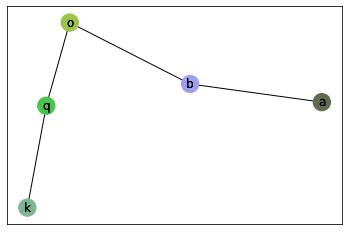

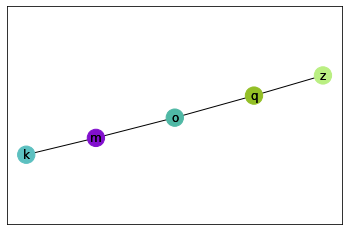

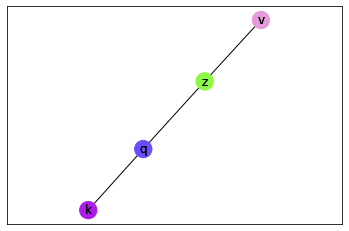

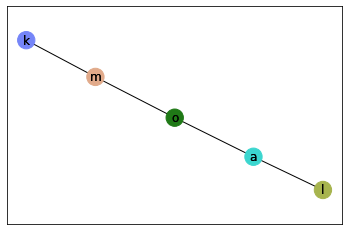

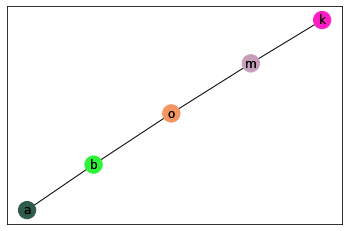

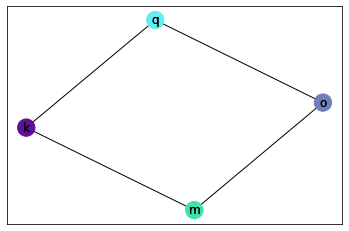

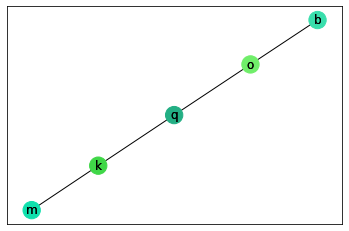

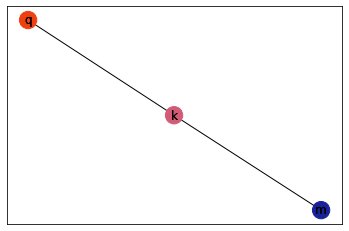

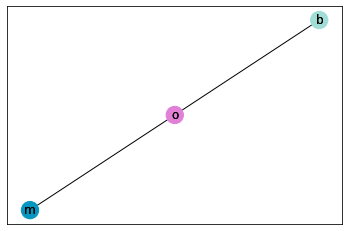

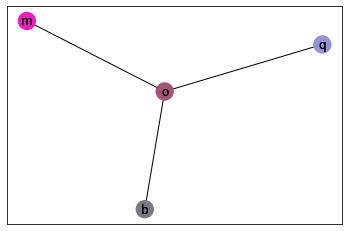

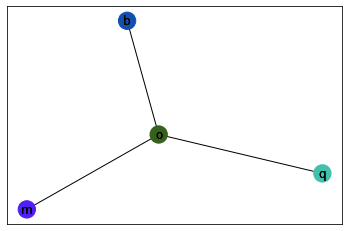

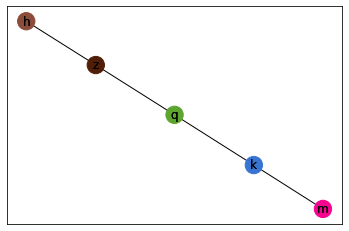

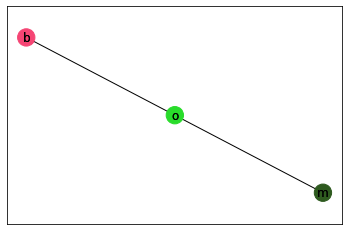

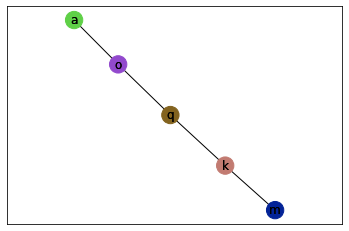

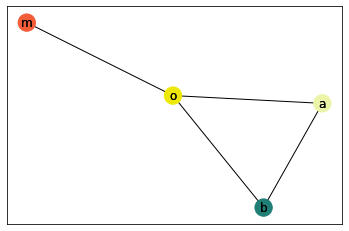

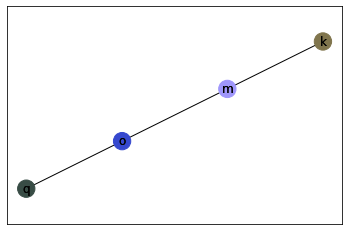

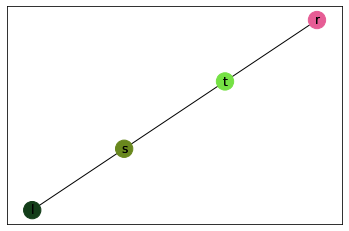

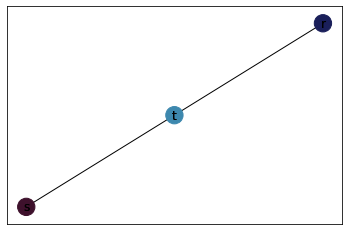

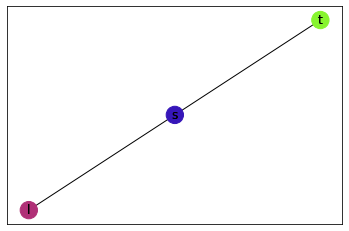

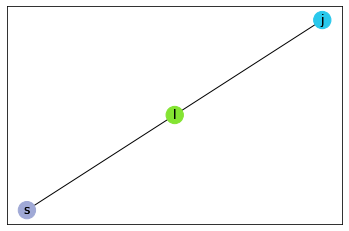

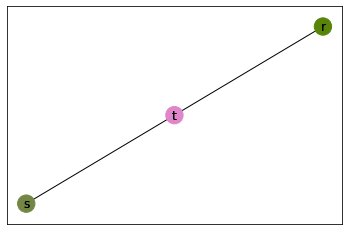

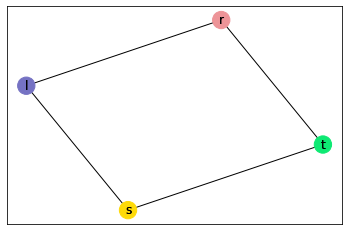

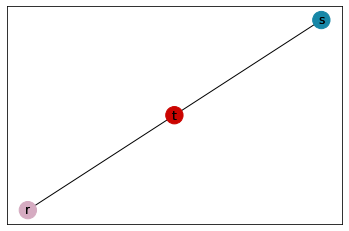

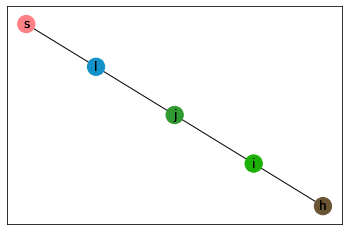

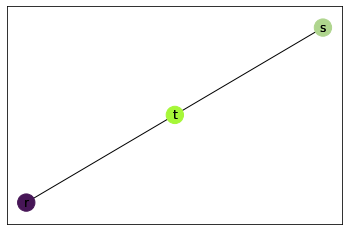

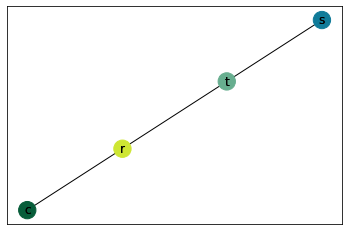

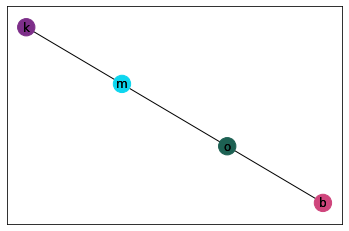

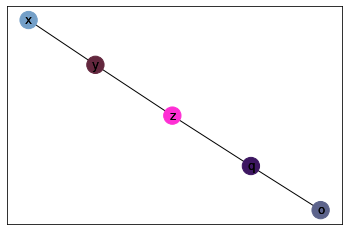

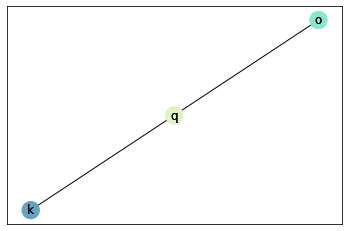

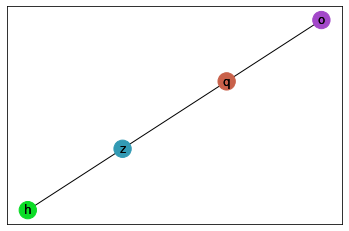

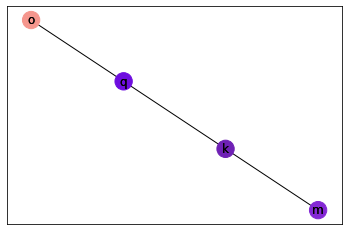

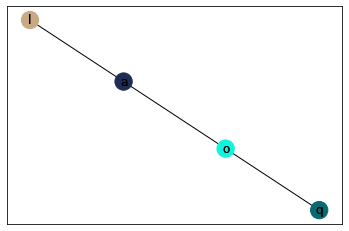

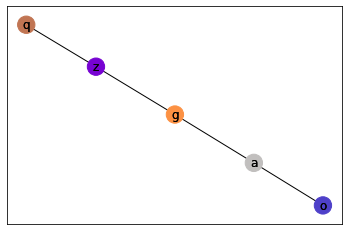

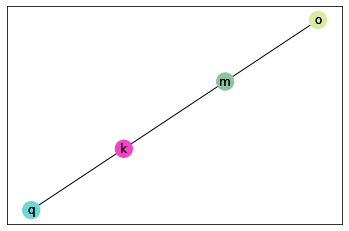

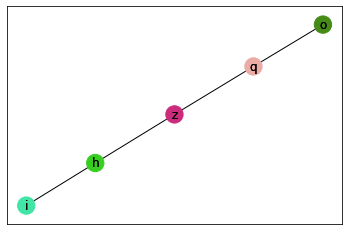

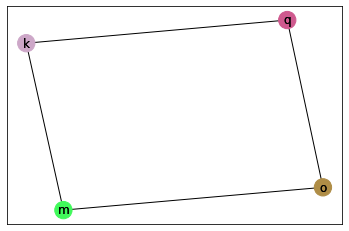

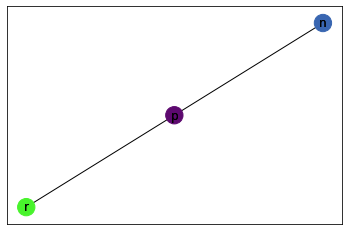

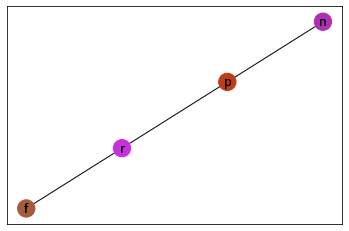

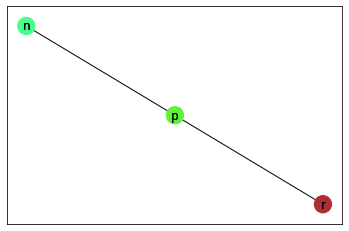

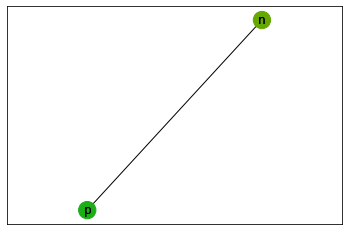

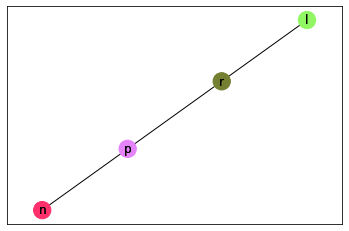

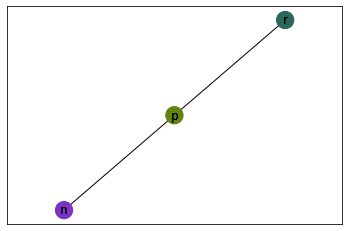

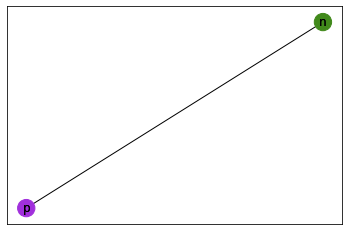

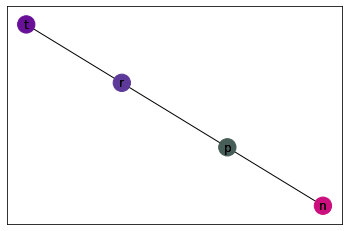

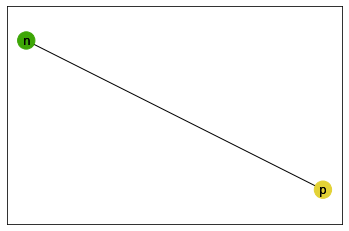

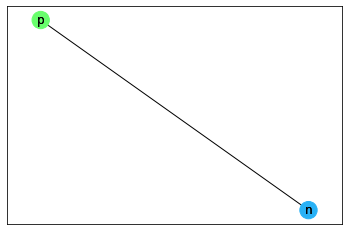

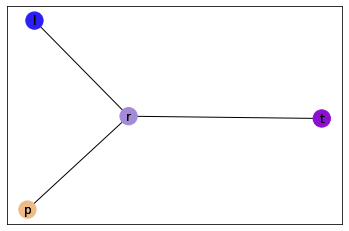

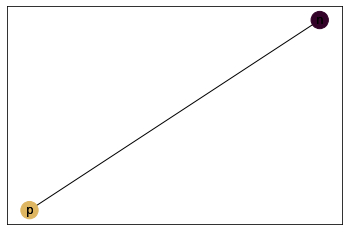

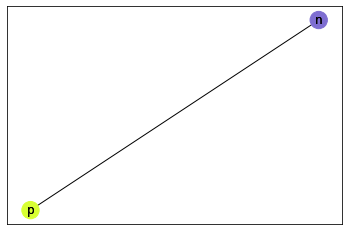

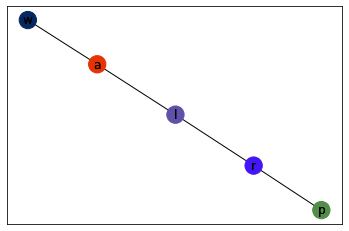

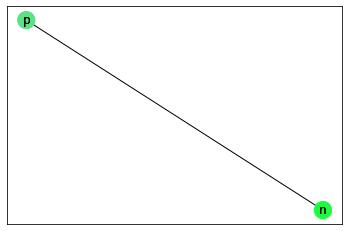

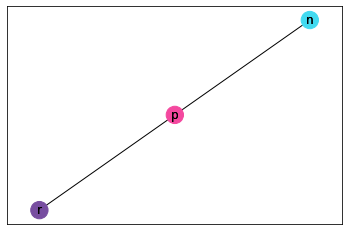

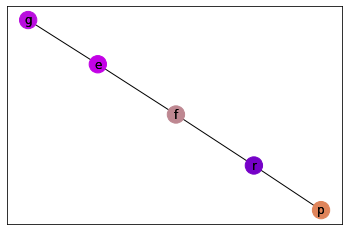

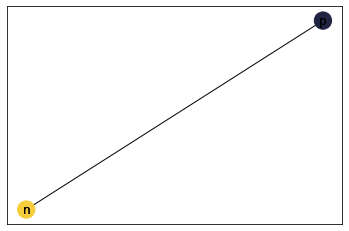

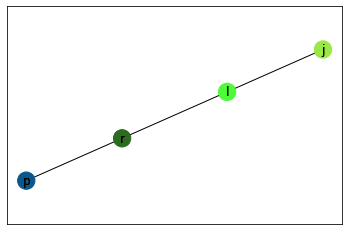

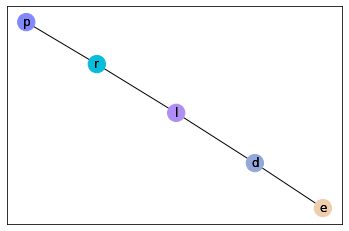

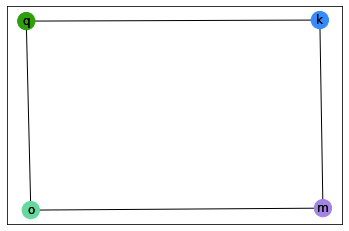

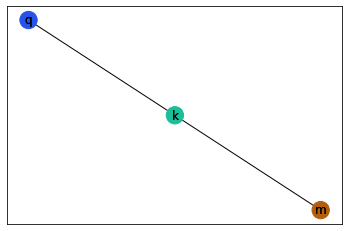

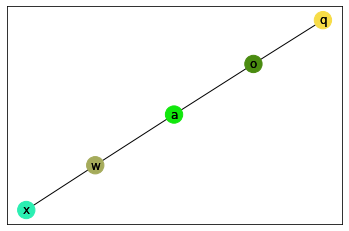

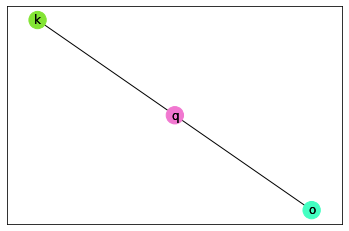

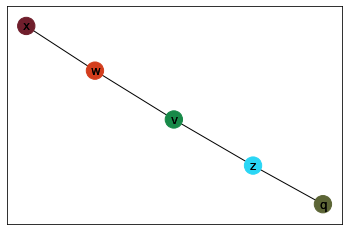

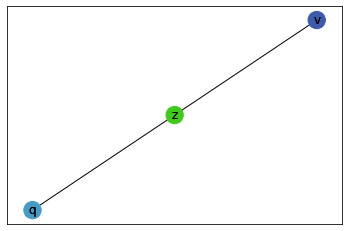

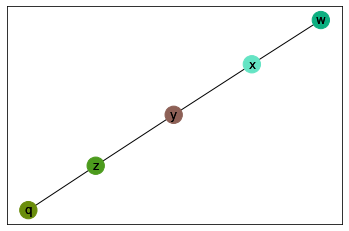

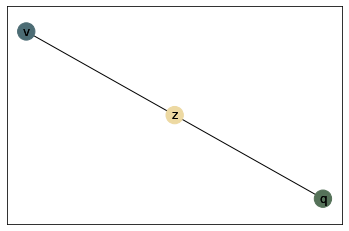

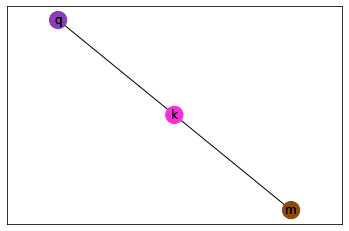

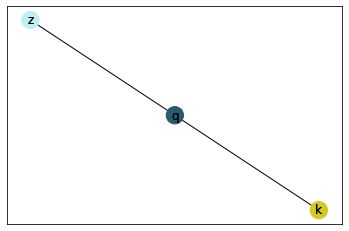

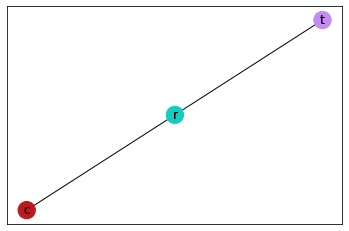

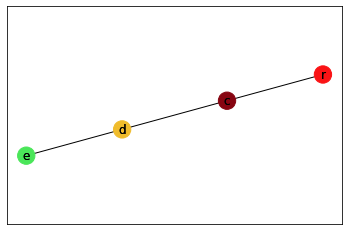

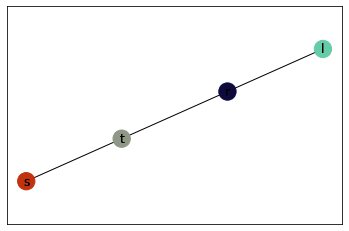

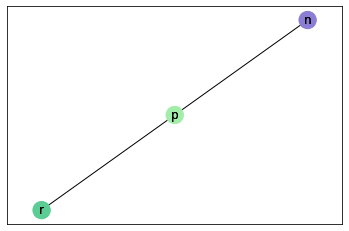

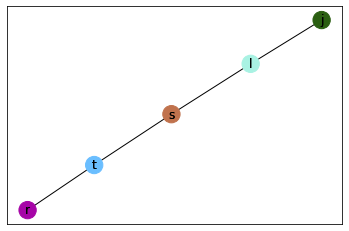

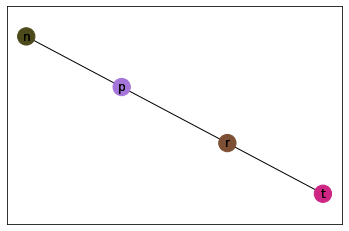

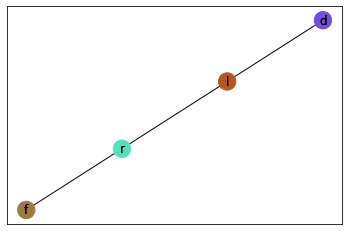

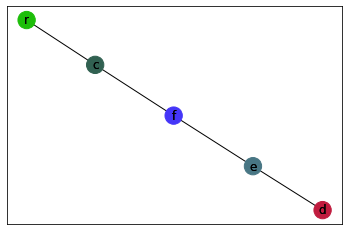

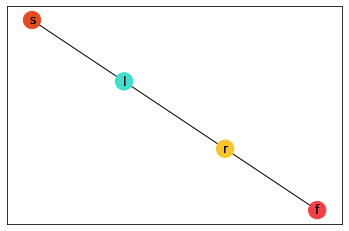

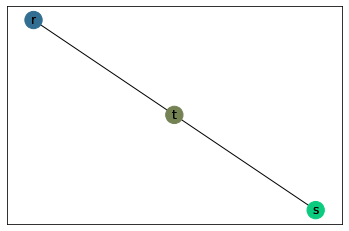

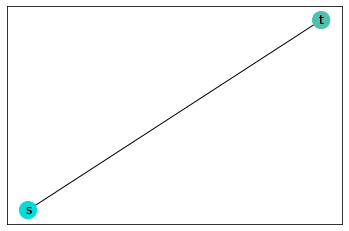

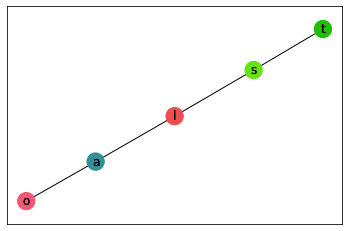

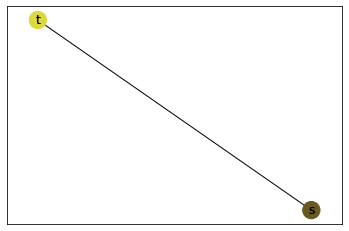

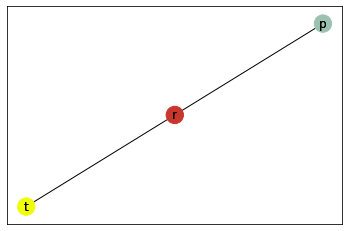

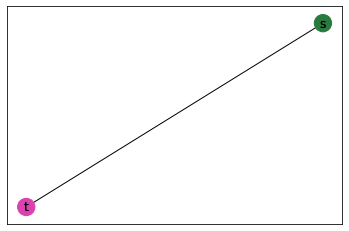

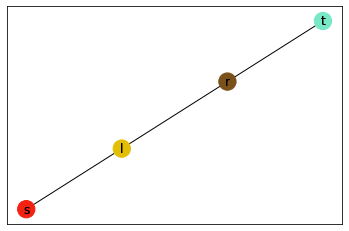

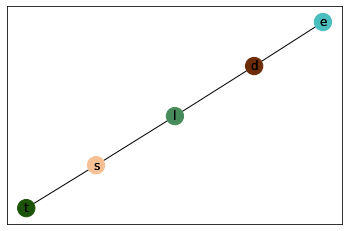

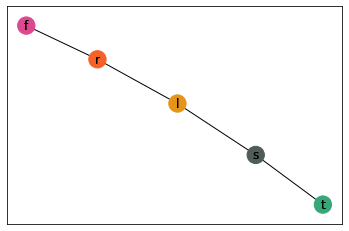

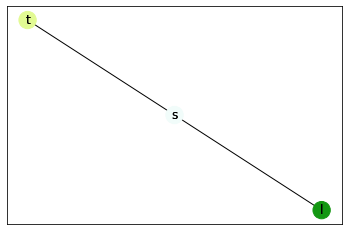

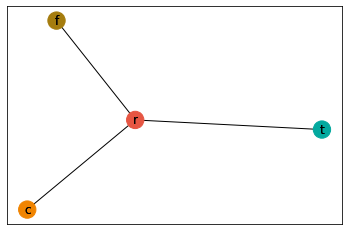

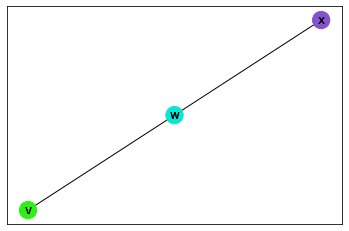

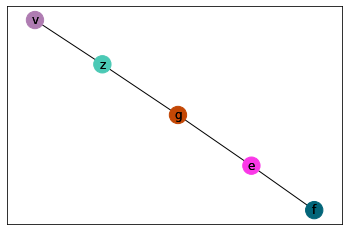

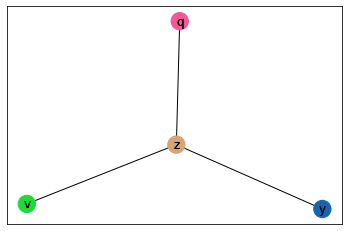

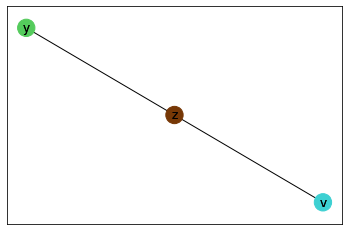

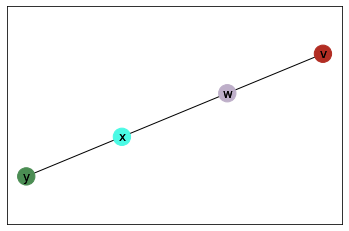

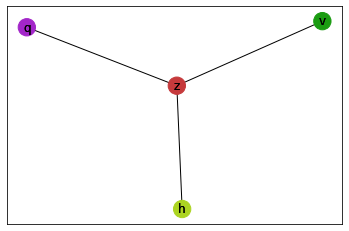

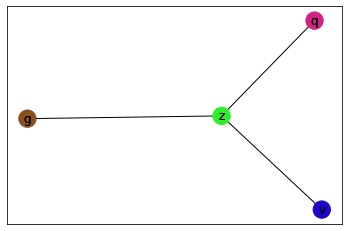

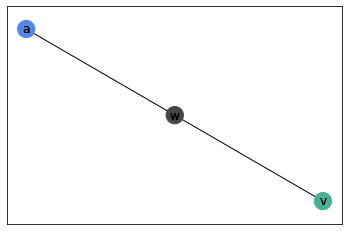

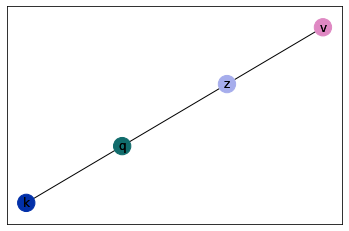

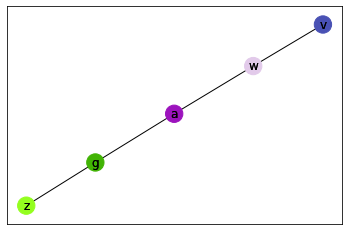

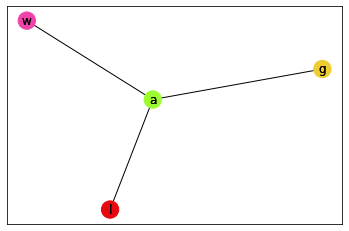

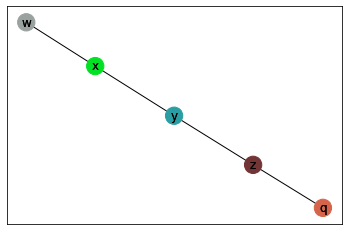

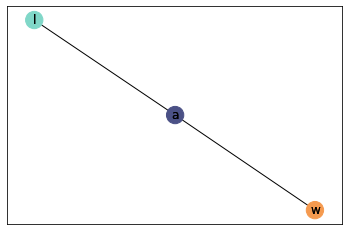

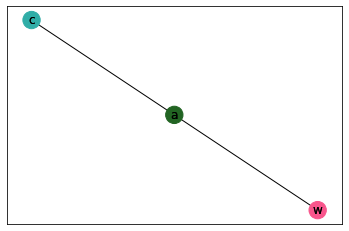

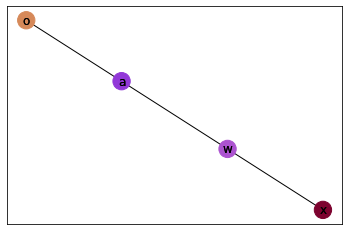

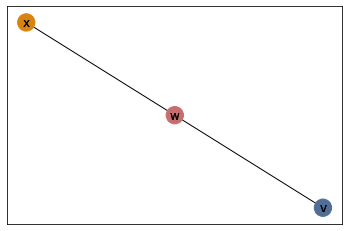

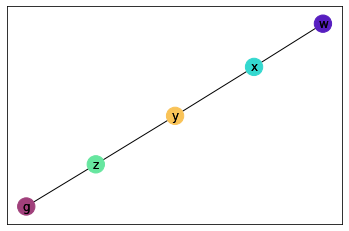

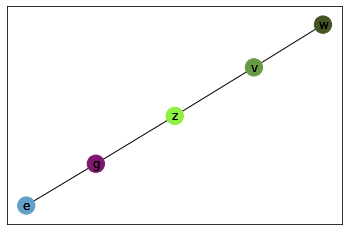

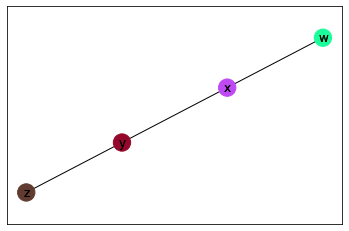

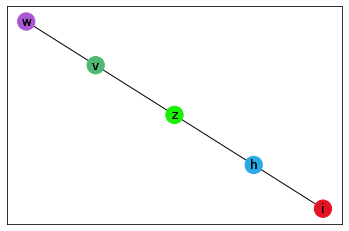

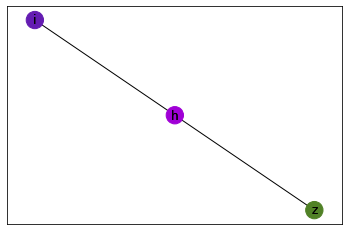

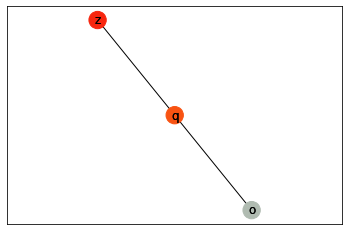

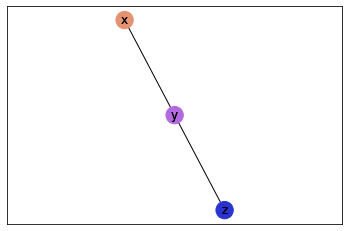

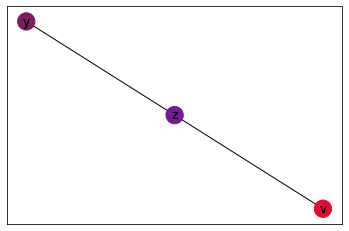

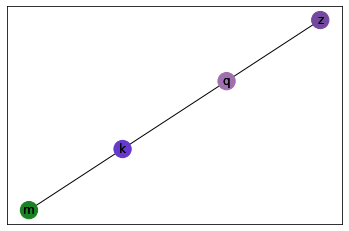

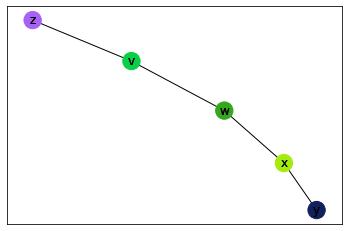

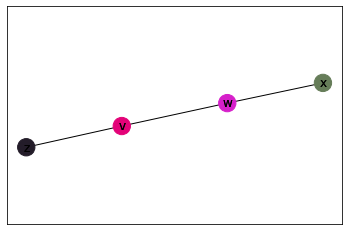

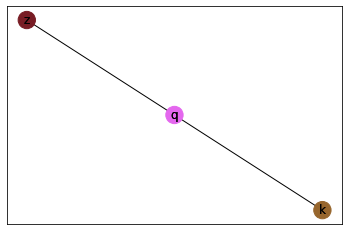

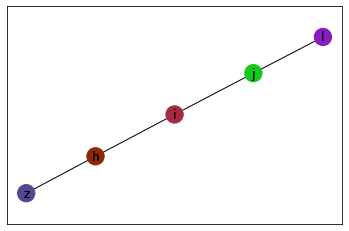

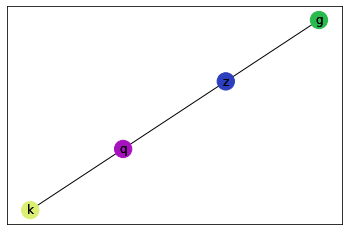

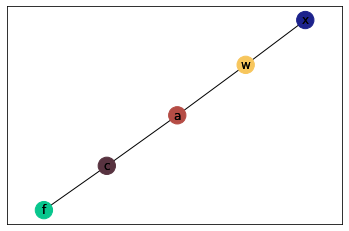

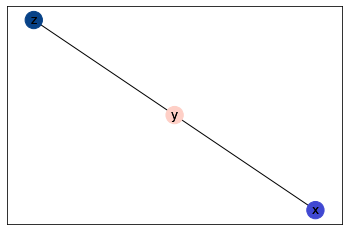

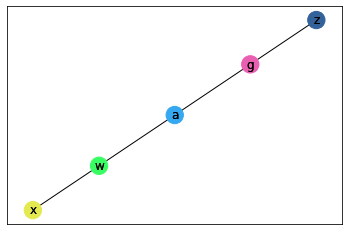

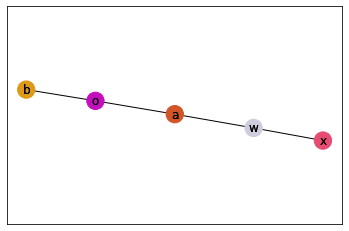

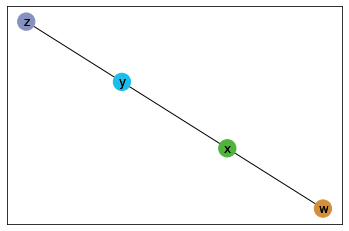

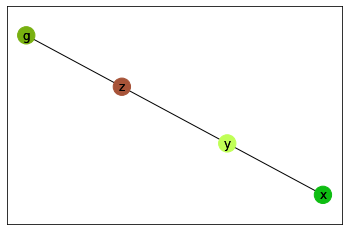

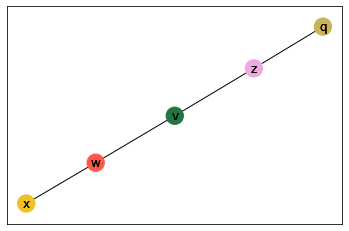

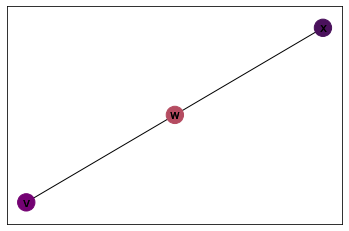

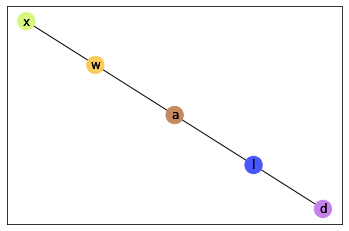

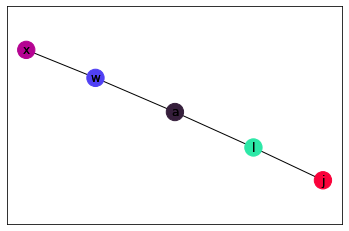

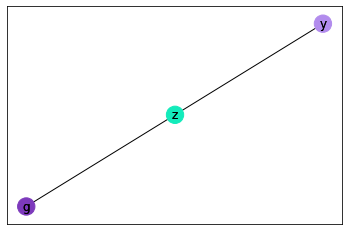

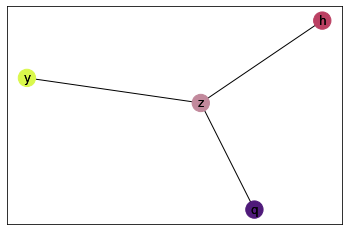

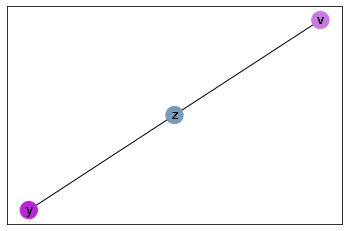

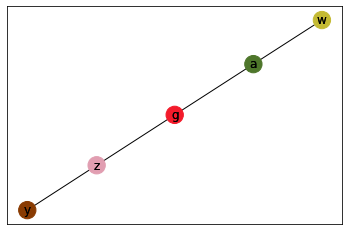

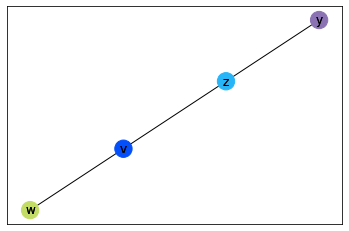

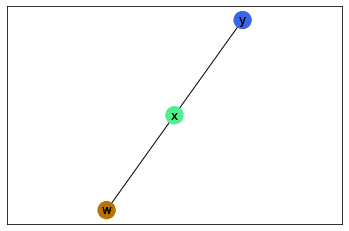

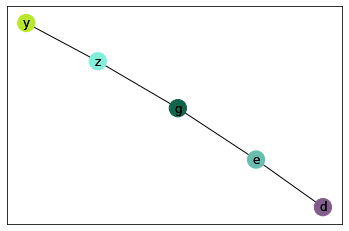

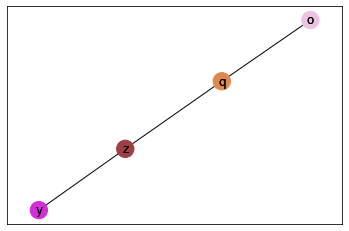

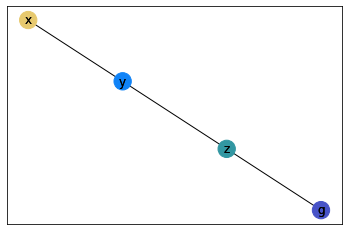

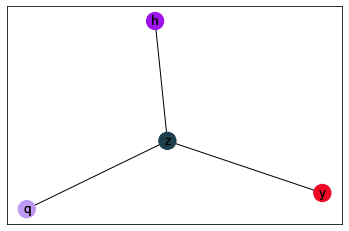

In [9]:
graph = nx.Graph()
i=1
for index in walks:
    graph.clear()
    edges=[]
    graph.add_nodes_from(index)
    for i in range(len(index)-1):
        graph.add_edge(str(index[i]),str(index[i+1]))
    number_of_colors = len(graph.nodes())
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            for i in range(number_of_colors)]
    pos=nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos,node_color = color)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos)
    plt.show()
   